![Practicum AI Logo image](https://github.com/PracticumAI/practicumai.github.io/blob/main/images/logo/PracticumAI_logo_250x50.png?raw=true)  <img src='images/03/data_wrangling.png' align='right' width=100>

# *Practicum AI Data*: Data Wrangling - pandas

This exercise is inspired by Lipp et al. (2020) <i>The Data Wrangling Workshop</i> from <a href="https://www.packtpub.com/product/the-data-wrangling-workshop-second-edition/9781839215001">Packt Publishers</a> and the <a href="https://github.com/swcarpentry/python-novice-gapminder">Software Carpentries</a>

***

In this notebook, we will start to explore [pandas](https://pandas.pydata.org/), a fast, powerful, flexible, and easy-to-use open-source data analysis and manipulation tool. 

## Objectives

By the end of this notebook, you will be able to:

1. Perform data reading and writing operations using pandas.
2. Perform basic data exploration and cleaning operations with pandas.

## 1. pandas <img src='images/03/pandas_logo.png' align='right' width=100>

pandas is a Python library that offers quick, versatile, and expressive data structures to simplify working with labeled or relational data. Its objective is to serve as the primary high-level building block for conducting practical data analysis in Python and aims to become the most potent and flexible open-source data analysis and manipulation tool across all programming languages. It has already made significant strides toward achieving this goal.

**Why use pandas?**
* pandas is a widely used and popular data science tool for Python programming language.
* pandas offers tools for filtering, sorting, grouping, joining, and aggregating data and supports the creation of visualizations.
* pandas is suitable for data cleaning and preparation, as well as exploratory data analysis, providing statistical operations to support these tasks.

**The feature of pandas:**
* Data Structures: pandas provides two primary data structures - Series and DataFrame - that can efficiently handle large amounts of data.
* Data Manipulation: pandas offers a suite of tools for data manipulation, including merging, slicing, filtering, and reshaping data, making it easier to extract insights from complex data sets.
* Missing Data Handling: pandas is equipped to handle missing data using various methods, such as interpolation, imputation, and deletion.
* Additionally, pandas has robust IO tools that allow loading of data from various sources, including CSV files, Excel files, and databases, and supports saving/loading of data in the HDF5 format, which is optimized for handling large datasets.

Now, let us delve into advanced data operations involving pandas DataFrames. We will explore several powerful DataFrame operations, such as subsetting, filtering, grouping, checking uniqueness, and handling missing data, among others. If you are interested in learning the basic functions of the pandas library, please visit our beginner series - [the python workshop](https://github.com/PracticumAI/python_teacher/blob/main/04.1_data_wrangling_teacher.ipynb). 

### 1.1 Subsetting, Filtering, and Grouping

At the forefront of the data science process, the data wrangling module bears the responsibility of fulfilling the demands of various machine learning models. As a data wrangling engineer, your tasks involve filtering and grouping data as necessary before processing and generating distinct datasets for individual machine learning models.

To begin, we will import our dataset into pandas. For this exercise, we will be using a well-known [wine review](https://www.kaggle.com/datasets/zynicide/wine-reviews) dataset containing 150k reviews that feature information such as wine variety, location, winery, price, and description. 

In [2]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/winemag-data_first150k.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
# Drop the unuseful columns

df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [5]:
# Check the shape of the dataset

df.shape

(150930, 10)

Before discussing filtering methods, let's take a detour and explore a useful function called `unique`. This function is capable of quickly scanning through the data and extracting only the unique values present in a column or row.

In [12]:
# Extract the country information from the database

df['country'].unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

In [14]:
# Use the nunique method to count the number of unique values

counts = df['country'].nunique()

print(f"There are {counts} countries in the dataset")

There are 48 countries in the dataset


#### Subsetting the DataFrame

Subsetting refers to the process of extracting partial data based on specific columns and rows to meet the project requirements. As an example, let's consider creating a report on worldwide wine prices. Suppose we are only concerned with the *country, province, points, and price* data from this dataset. For demonstration purposes, let's assume we only want to extract ten records - rows 100-110.

We can employ the `loc` method to index the dataset by the column names and row indexes.

In [6]:
df_subset = df.loc[
    [i for i in range(100, 110)],
    ['country', 'province', 'points','price']]

df_subset

,country,province,points,price
100,US,California,86,24.0
101,US,California,86,50.0
102,Italy,Tuscany,86,45.0
103,US,California,86,48.0
104,US,California,86,20.0
105,US,Washington,86,17.0
106,US,California,86,12.0
107,US,California,86,10.0
108,US,California,86,13.0
109,US,California,86,45.0


#### Conditional Selection and Boolean Filtering

In data wrangling, it is often unnecessary to process the entire dataset, and instead, we may need to select only a portion of the data that meets a specific condition. This is a common task in data wrangling. When working with the white wine quality dataset, we may want to answer questions such as:

* What is the average price of wine in the US?
* Which states in the US have the highest and lowest wine prices?

To accomplish this, we must first understand the concept of boolean indexing. Essentially, boolean indexing involves passing a conditional expression as an argument, which returns a boolean dataset where the **TRUE** value is present in locations where the condition was satisfied.

In [7]:
# Create a subset that only includes the columns for country, province, and price

df_subset = df.loc[
    [i for i in range(140, 160)],
    ['country', 'province', 'price']]

df_subset

,country,province,price
140,France,Bordeaux,15.0
141,US,California,28.0
142,US,California,25.0
143,US,Oregon,26.0
144,US,California,24.0
145,US,California,55.0
146,US,California,36.0
147,Spain,Galicia,17.0
148,US,California,40.0
149,US,California,28.0


If we want to retrieve records with a wine price higher than $30, we can use the following code:

In [8]:
df_subset['price'] > 30

140    False
141    False
142    False
143    False
144    False
145     True
146     True
147    False
148     True
149    False
150     True
151    False
152    False
153    False
154    False
155    False
156    False
157    False
158     True
159    False
Name: price, dtype: bool

Examining the True and False entries in the price column, we can observe that the values in the country and province columns remained unchanged because the comparison was made with a numerical quantity, and the sole numeric column in the original DataFrame was the price.

Next, we can explore the outcome of utilizing this boolean DataFrame as an index to the original DataFrame.

In [11]:
df_subset[df_subset['price']>30]

,country,province,price
145,US,California,55.0
146,US,California,36.0
148,US,California,40.0
150,US,Oregon,50.0
158,Spain,Northern Spain,44.0


Remember, we can apply conditional expressions involving non-numerical values as well. For instance, we can extract entries with high wine prices (>30) for those that are just related to the US.

In [16]:
df_subset[(df_subset['country'] == 'US') \
            & (df_subset['price'] > 30)]

,country,province,price
145,US,California,55.0
146,US,California,36.0
148,US,California,40.0
150,US,Oregon,50.0


The extracted rows are the ones where the country is the US and the wine price is greater than $30, achieved by combining two conditional expressions using the "&" operator, one involving a string.

#### The GroupBy Method

The GroupBy process involves three steps: 

* splitting data into groups based on some criteria,
* applying a function to each group independently,
* combining the results into a data structure. 

This process is useful when we need to split the dataset into groups and perform some operation on those groups. 

In the apply step, we can perform *aggregation* to compute a summary statistic for each group, *transformation* to perform a group-specific computation and return a like-indexed object, or *filtration* to discard a few groups based on a group-wise computation that evaluates to *TRUE* or *FALSE*.


In [17]:
bycountry = df_subset.groupby('country')
bycountry

In [18]:
print("\nGrouping by 'country' column and listing mean wine price\n",
      sep='')

bycountry.mean()  


Grouping by 'country' column and listing mean wine price



,price
country,
Chile,19.5
France,17.5
Greece,21.0
Spain,26.0
US,33.6


In [19]:
# Subset the data frame for a particular value and show the statistics

pd.DataFrame(bycountry.describe().loc['US'])

US
price count  10.000000
      mean   33.600000
      std    11.315673
      min    24.000000
      25%    25.250000
      50%    28.000000
      75%    39.000000
      max    55.000000

### 1.2 Detecting outliers and Handling missing values

Detecting outliers and handling missing values are important aspects of ensuring data quality. In any modeling or data mining process, the output quality is heavily reliant on the consistency and quality of the input data.

#### Missing values in pandas

The function `isnull` is one of the most helpful tools for identifying missing values.

In [21]:
df_missing = df[-10:]
df_missing

,country,description,designation,points,price,province,region_1,region_2,variety,winery
150920,Italy,"Rich and mature aromas of smoke, earth and her...",Brut Riserva,91,19.0,Northeastern Italy,Trento,NaN,Champagne Blend,Letrari
150921,France,Shows some older notes: a bouquet of toasted w...,Blanc de Blancs Brut Mosaïque,91,38.0,Champagne,Champagne,NaN,Champagne Blend,Jacquart
150922,Italy,Made by 30-ish Roberta Borghese high above Man...,Superiore,91,NaN,Northeastern Italy,Colli Orientali del Friuli,NaN,Tocai,Ronchi di Manzano
150923,France,"Rich and toasty, with tiny bubbles. The bouque...",Demi-Sec,91,30.0,Champagne,Champagne,NaN,Champagne Blend,Jacquart
150924,France,"Really fine for a low-acid vintage, there's an...",Diamant Bleu,91,70.0,Champagne,Champagne,NaN,Champagne Blend,Heidsieck & Co Monopole
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset
150929,Italy,More Pinot Grigios should taste like this. A r...,NaN,90,15.0,Northeastern Italy,Alto Adige,NaN,Pinot Grigio,Alois Lageder


In [22]:
df_missing.isnull()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
150920,False,False,False,False,False,False,False,True,False,False
150921,False,False,False,False,False,False,False,True,False,False
150922,False,False,False,False,True,False,False,True,False,False
150923,False,False,False,False,False,False,False,True,False,False
150924,False,False,False,False,False,False,False,True,False,False
150925,False,False,True,False,False,False,False,True,False,False
150926,False,False,False,False,False,False,False,True,False,False
150927,False,False,False,False,False,False,False,True,False,False
150928,False,False,False,False,False,False,False,True,False,False
150929,False,False,True,False,False,False,False,True,False,False


All missing values in the DataFrame are represented as *NaN*. The `isnull` function returns a DataFrame of the same shape as the original, where each element is *True* if it is a missing value and *False* otherwise.

To detect, count, and print missing values in each column of a DataFrame, we can chain the `isnull` method with the `sum` method. The `sum` method sums up all the *True* values in each column, giving us the total count of missing values in each column. Then we can use the `print` function to output the results.

In [23]:
for c in df_missing.columns:
    miss = df_missing[c].isnull().sum()
    if miss > 0:
        print(f"{c} has {miss} missing value(s)")
    else:
        print(f"{c} has NO missing value(s)")

country has NO missing value(s)
description has NO missing value(s)
designation has 2 missing value(s)
points has NO missing value(s)
price has 1 missing value(s)
province has NO missing value(s)
region_1 has NO missing value(s)
region_2 has 10 missing value(s)
variety has NO missing value(s)
winery has NO missing value(s)


As observed in the previous output, the presence of missing values was detected in the wine reviews dataset.

To address the issue of missing values, we need to find ways to fill them. The `fillna` method can be used for filling string data, while the `ffill` or `bfill` function can be used for filling numerical data.

In [24]:
# Fill the specified columns missing values with the 'FILL' string 

df_missing[['designation','region_2']].fillna('FILL')

,designation,region_2
150920,Brut Riserva,FILL
150921,Blanc de Blancs Brut Mosaïque,FILL
150922,Superiore,FILL
150923,Demi-Sec,FILL
150924,Diamant Bleu,FILL
150925,FILL,FILL
150926,Cuvée Prestige,FILL
150927,Terre di Dora,FILL
150928,Grand Brut Rosé,FILL
150929,FILL,FILL


In [25]:
# Fill the missing values using forward fill on the price column

df_missing['price'].fillna(method='ffill')

150920    19.0
150921    38.0
150922    38.0
150923    30.0
150924    70.0
150925    20.0
150926    27.0
150927    20.0
150928    52.0
150929    15.0
Name: price, dtype: float64

In [26]:
# Fill the missing values using backward fill on the price column

df_missing['price'].fillna(method='bfill')

150920    19.0
150921    38.0
150922    30.0
150923    30.0
150924    70.0
150925    20.0
150926    27.0
150927    20.0
150928    52.0
150929    15.0
Name: price, dtype: float64

In [27]:
# Fill the missing values in the price column with the average value

df_missing['price'].fillna(df_missing.mean(numeric_only=True)['price'])

150920    19.000000
150921    38.000000
150922    32.333333
150923    30.000000
150924    70.000000
150925    20.000000
150926    27.000000
150927    20.000000
150928    52.000000
150929    15.000000
Name: price, dtype: float64

The `dropna` method can be used to eliminate rows or columns that contain *NaN* or missing values.

In [28]:
df_missing.dropna(axis=1, how='all', thresh=None)

,country,description,designation,points,price,province,region_1,variety,winery
150920,Italy,"Rich and mature aromas of smoke, earth and her...",Brut Riserva,91,19.0,Northeastern Italy,Trento,Champagne Blend,Letrari
150921,France,Shows some older notes: a bouquet of toasted w...,Blanc de Blancs Brut Mosaïque,91,38.0,Champagne,Champagne,Champagne Blend,Jacquart
150922,Italy,Made by 30-ish Roberta Borghese high above Man...,Superiore,91,NaN,Northeastern Italy,Colli Orientali del Friuli,Tocai,Ronchi di Manzano
150923,France,"Rich and toasty, with tiny bubbles. The bouque...",Demi-Sec,91,30.0,Champagne,Champagne,Champagne Blend,Jacquart
150924,France,"Really fine for a low-acid vintage, there's an...",Diamant Bleu,91,70.0,Champagne,Champagne,Champagne Blend,Heidsieck & Co Monopole
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,Champagne Blend,Gosset
150929,Italy,More Pinot Grigios should taste like this. A r...,NaN,90,15.0,Northeastern Italy,Alto Adige,Pinot Grigio,Alois Lageder


<div style="padding: 10px;margin-bottom: 20px;border: thin solid #65BB7B;border-left-width: 10px;background-color: #fff"><strong>Note:</strong> The <code>dropna()</code> method allows dropping rows or columns containing NaN or missing values by setting the <code>axis</code> parameter to 0 or 1, respectively. Additionally, the method accepts two other arguments that can be helpful:</p>
<ul>
  <li>The <code>how</code> argument determines whether to remove a row or column when at least one or all values are NaN.</li>
  <li>The <code>thresh</code> argument specifies the minimum number of non-NaN values required to keep a row or column.</li>
</ul>

</div>

#### Outlier Detection

Outliers in a dataset can occur due to many factors and in many ways. Some of the factors that can cause outliers include:

* **Data entry errors:** mistakes made when manually recording data;
* **Experimental errors:** errors that occur during experiments, such as measurement errors due to noise or instrumental failure;
* **Data processing errors:** mistakes made during data cleaning or processing, such as incorrect data transformations or missing values;
* **Sampling errors:** errors that arise from the sampling process, such as selecting an unrepresentative sample or not sampling enough data.

Due to the various factors that can cause outliers, it is impossible to pinpoint one universal method for outlier detection. However, standard statistical tests can be used to detect outliers in numerical data.

<AxesSubplot:>

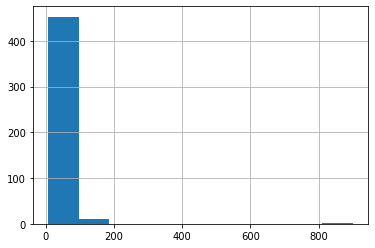

In [29]:
# Create a subset dataset
df_subset = df[['country','province','price']].sample(n=500)

# Plot the histogram to detect the outliers
df_subset['price'].hist()

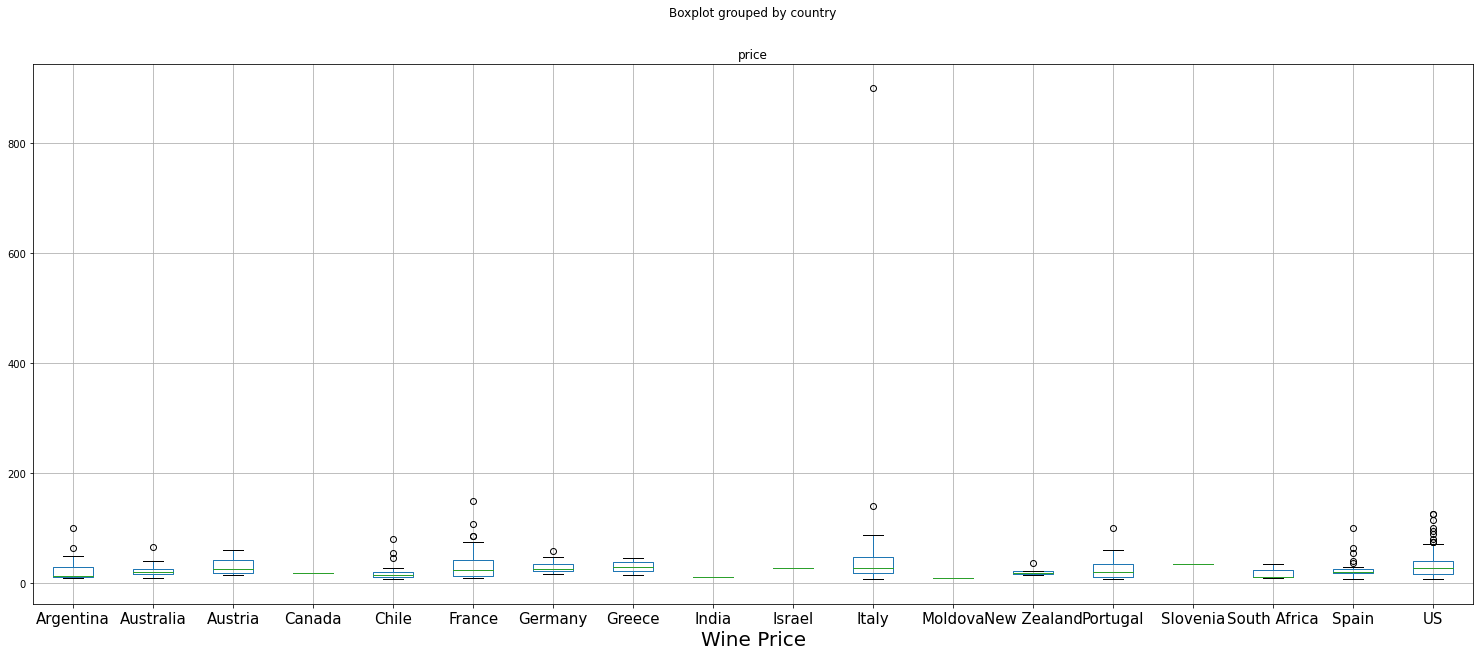

In [30]:
# Plot the boxplot with matplotlib to detect the outliers

df_subset.boxplot(column='price',by='country',figsize=(25,10))
plt.xticks(fontsize=15)
plt.xlabel("Wine Price",fontsize=20)
plt.show()

The process of detecting outliers involves creating a distribution of a numerical quantity and identifying values that lie at the extreme ends. These values may be outliers or genuine data points. 

In the case of the dataset we are analyzing, we can examine the distribution using a histogram and a box plot. If we find a value that is more than four or five standard deviations away from the mean, it may be a suspectable outlier.

### 1.3 Concatenating, Merging, and Joining

#### Concatenation

The operation of concatenation is highly beneficial since it facilitates the expansion of data or the addition of new feature columns to a table. You can practice this by using the following code.

In [10]:
# First, create three DataFrames by randomly sampling from the original dataset
df_1 = df[['country', 'province', 'points','price']].sample(n=5)
df_2 = df[['country', 'province', 'points','price']].sample(n=5)
df_3 = df[['country', 'province', 'points','price']].sample(n=5)

# Second, create a merged DataFrame that includes all the rows concatenated
df_row = pd.concat([df_1, df_2, df_3], axis=0)
df_row

,country,province,points,price
75734,US,New York,86,10.0
94984,Austria,Wachau,92,25.0
9871,France,Provence,88,20.0
32465,Australia,South Australia,90,30.0
12821,US,California,93,55.0
4953,US,Oregon,88,23.0
82773,US,New York,88,18.0
37998,France,Loire Valley,86,22.0
12964,US,California,86,50.0
108424,Australia,Western Australia,86,23.0


In [11]:
# Third, create a merged DataFrame with all the columns concatenated
df_column = pd.concat([df_1, df_2, df_3], axis=1)
df_column

,country,province,points,price,country,province,points,price,country,province,points,price
4953,NaN,NaN,NaN,NaN,US,Oregon,88.0,23.0,NaN,NaN,NaN,NaN
6342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Italy,Piedmont,88.0,28.0
9871,France,Provence,88.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12821,US,California,93.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12964,NaN,NaN,NaN,NaN,US,California,86.0,50.0,NaN,NaN,NaN,NaN
32465,Australia,South Australia,90.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37998,NaN,NaN,NaN,NaN,France,Loire Valley,86.0,22.0,NaN,NaN,NaN,NaN
75734,US,New York,86.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82773,NaN,NaN,NaN,NaN,US,New York,88.0,18.0,NaN,NaN,NaN,NaN
83289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,California,94.0,350.0


#### Merging by a common key

Performing a merge using a common key is a highly frequent operation for data tables. It enables the consolidation of multiple data sources into a single master database.

When joining or merging two DataFrames, there are two distinct types: inner and outer.

* **Inner:** This method combines datasets using a column or key to compare each dataset. Only rows that have the same column or key will be present in the merged data.
* **Outer:** This approach also combines datasets like inner, but preserves all data on either the right or left side, and matches corresponding data from the opposite side.

Let's now explore how this can be achieved.

In [22]:
# Create the first DataFrame with the point common key
df_1 = df[['country', 'points', 'region_1']][0:4]

# Create the second DataFrame with the price common key
df_2 = df[['country', 'province', 'price']][2:6]

# Merge the two DataFrames with an inner join and drop the duplicates
pd.merge(df_1, df_2, on='country', how='inner').drop_duplicates()

,country,points,region_1,province,price
0,US,96,Napa Valley,California,90.0
1,US,96,Napa Valley,Oregon,65.0
2,US,96,Knights Valley,California,90.0
3,US,96,Knights Valley,Oregon,65.0
4,US,96,Willamette Valley,California,90.0
5,US,96,Willamette Valley,Oregon,65.0
6,Spain,96,Toro,Northern Spain,73.0


In [23]:
# Perform an outer join with drop the duplicates

pd.merge(df_1, df_2, on='country',how='outer').drop_duplicates()

,country,points,region_1,province,price
0,US,96.0,Napa Valley,California,90.0
1,US,96.0,Napa Valley,Oregon,65.0
2,US,96.0,Knights Valley,California,90.0
3,US,96.0,Knights Valley,Oregon,65.0
4,US,96.0,Willamette Valley,California,90.0
5,US,96.0,Willamette Valley,Oregon,65.0
6,Spain,96.0,Toro,Northern Spain,73.0
7,France,NaN,NaN,Provence,66.0


#### The join method

Joining is executed by merging columns from two DataFrames, which may have different indexes, into a single DataFrame based on index keys. The table below provides a summary of the various joins and their functions.

| Join type    | Function                                                             |
| :----------- | -------------------------------------------------------------------- |
| Left outer   | The joining process retains all the rows from the first DataFrame in the join statement, based on the common index key(s). If any rows in the second DataFrame have no corresponding match, these rows will contain null values. |
| Right outer  | Use the second Datafram in the join statement as starting point for matching keys. If any rows in the first DataFrame have no corresponding match, these rows will contain null values.|
| Inner        | Return only the rows that match both DataFrames based on the shared index key(s). |
| Full outer   | The joining process retains all rows from both DataFrames, and combines rows based on the shared index key(s) when they align correctly. |

Let's explore how this can be achieved.

In [28]:
# Create one DataFrame with the country as the index

df_1  = df[['country', 'points', 'price']][0:4]
df_1.set_index(['country'], inplace=True)
df_1

,points,price
country,,
US,96,235.0
Spain,96,110.0
US,96,90.0
US,96,65.0


In [29]:
# Create another DataFrame with the country as the index

df_2 = df[['country', 'variety', 'winery']][2:6]
df_2.set_index(['country'], inplace=True)
df_2

,variety,winery
country,,
US,Sauvignon Blanc,Macauley
US,Pinot Noir,Ponzi
France,Provence red blend,Domaine de la Bégude
Spain,Tinta de Toro,Numanthia


In [30]:
# Perform a left join on df_1 and df_2

df_1.join(df_2, how='left').drop_duplicates()

,points,price,variety,winery
country,,,,
Spain,96,110.0,Tinta de Toro,Numanthia
US,96,235.0,Sauvignon Blanc,Macauley
US,96,235.0,Pinot Noir,Ponzi
US,96,90.0,Sauvignon Blanc,Macauley
US,96,90.0,Pinot Noir,Ponzi
US,96,65.0,Sauvignon Blanc,Macauley
US,96,65.0,Pinot Noir,Ponzi


In [31]:
# Perform a right join on df_1 and df_2

df_1.join(df_2, how='right').drop_duplicates()

,points,price,variety,winery
country,,,,
France,NaN,NaN,Provence red blend,Domaine de la Bégude
Spain,96.0,110.0,Tinta de Toro,Numanthia
US,96.0,235.0,Sauvignon Blanc,Macauley
US,96.0,90.0,Sauvignon Blanc,Macauley
US,96.0,65.0,Sauvignon Blanc,Macauley
US,96.0,235.0,Pinot Noir,Ponzi
US,96.0,90.0,Pinot Noir,Ponzi
US,96.0,65.0,Pinot Noir,Ponzi


In [32]:
# Perform an inner join on df_1 and df_2

df_1.join(df_2, how='inner').drop_duplicates()

,points,price,variety,winery
country,,,,
Spain,96,110.0,Tinta de Toro,Numanthia
US,96,235.0,Sauvignon Blanc,Macauley
US,96,235.0,Pinot Noir,Ponzi
US,96,90.0,Sauvignon Blanc,Macauley
US,96,90.0,Pinot Noir,Ponzi
US,96,65.0,Sauvignon Blanc,Macauley
US,96,65.0,Pinot Noir,Ponzi


In [33]:
# Perform an outer join on df_1 and df_2

df_1.join(df_2, how='outer').drop_duplicates()

,points,price,variety,winery
country,,,,
France,NaN,NaN,Provence red blend,Domaine de la Bégude
Spain,96.0,110.0,Tinta de Toro,Numanthia
US,96.0,235.0,Sauvignon Blanc,Macauley
US,96.0,235.0,Pinot Noir,Ponzi
US,96.0,90.0,Sauvignon Blanc,Macauley
US,96.0,90.0,Pinot Noir,Ponzi
US,96.0,65.0,Sauvignon Blanc,Macauley
US,96.0,65.0,Pinot Noir,Ponzi


### 1.4 Other small useful methods of pandas

The pandas library has several small utility functions that can be helpful for efficient DataFrame operations.

#### Randomized sampling

One such function is `sample()`, which is commonly used in machine learning data wrangling pipelines to randomly select a subset of data for training or testing.

The `sample()` method allows us to sample a random fraction of a large DataFrame. Here's an example of how we can use it:

In [34]:
# Specify the number of samples

df.sample(n=5)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
10529,Austria,This is a beautifully structured wine that has...,Loibner Steinertal Smaragd,95,57.0,Wachau,NaN,NaN,Grüner Veltliner,F X Pichler
34727,Italy,"A blend of Cabernet Sauvignon, Merlot and Cabe...",Miterre,89,NaN,Tuscany,Bolgheri,NaN,Red Blend,Campo al Noce
16626,Austria,Icewine from Cabernet Sauvignon is pretty rare...,Ice Wine,88,50.0,Niederösterreich,NaN,NaN,Cabernet Sauvignon,Pratsch
6439,US,A sense of sweetness from oak smooths out this...,Rezerve,85,24.0,California,Amador County,Sierra Foothills,Primitivo,Sobon Estate
57736,Spain,This tiny production SB is sweet and easygoing...,Doña Beatriz,86,12.0,Northern Spain,Rueda,NaN,Sauvignon,Bodegas Cerrosol


In [35]:
# Specify a definite fraction (percentage)

df.sample(frac=0.1)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
9629,Australia,Yarra Valley isn't really where you'd expect t...,Warramunda Reprise,91,28.0,Victoria,Yarra Valley,NaN,Marsanne,Ben Haines
75285,US,"A bit on the hot side, reflecting the extra wa...",Dollarhide,92,85.0,California,Napa Valley,Napa,Cabernet Sauvignon,St. Supéry
25121,Italy,"Il Moro offers intense aromas of blackberry, c...",Il Moro,88,25.0,Sicily & Sardinia,Sicilia,NaN,Nero d'Avola,Valle dell'Acate
25335,Portugal,Raisins and ripe fruit combine in this LBV tha...,Late Bottled Vintage,87,NaN,Port,NaN,NaN,Port,Cálem
141237,US,"Stimulatingly fresh and clean, this polished S...",NaN,86,18.0,California,Russian River Valley,Sonoma,Sauvignon Blanc,Sauvignon Republic
...,...,...,...,...,...,...,...,...,...,...
69310,Italy,A deep mineral vein adds gorgeous depth and co...,NaN,92,74.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Palazzo
40079,France,"There is warmth to this fruity, ripe wine. It ...",A. Rodet,86,18.0,Burgundy,Bourgogne,NaN,Chardonnay,Antonin Rodet
98734,France,The structure is present as is the bright blac...,Cuvée Alliance,86,15.0,Southwest France,Bergerac,NaN,Bordeaux-style Red Blend,Château Bélingard
103408,Chile,"A little green for starters, but mostly you ge...",Vineyard's Selection Reserva,83,11.0,Aconcagua Valley,NaN,NaN,Syrah,Gracia de Chile


In [36]:
# Choose a sampling with repetition

df.sample(frac=0.1, replace=True)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
107869,France,93-95 Barrel sample. Definite new wood aromas ...,Barrel sample,94,NaN,Bordeaux,Saint-Émilion,NaN,Bordeaux-style Red Blend,Château Troplong Mondot
128990,US,"Made in a popular style of crisply acidic, cle...",NaN,85,16.0,California,Sonoma County,Sonoma,Pinot Gris,Kenwood
49729,US,"Dry, light-bodied and silky, showing some gree...",Solomon Hills Vineyard,87,40.0,California,Santa Maria Valley,Central Coast,Pinot Noir,Flying Goat Cellars
65812,US,"Rather tough and astringent now, with crunchy,...",Rochioli-Allen Vineyards,88,70.0,California,Russian River Valley,Sonoma,Pinot Noir,Gary Farrell
107890,US,"From the estate vineyard in Philo, a spicy, ge...",Day Ranch,88,40.0,California,Anderson Valley,Mendocino/Lake Counties,Pinot Noir,Standish
...,...,...,...,...,...,...,...,...,...,...
19145,US,"This lush, smooth and supple Cabernet is drink...",Special Reserve,90,38.0,California,Alexander Valley,Sonoma,Cabernet Sauvignon,Herzog
53039,US,"Zinfandel, Cabernet Sauvignon, Merlot and Peti...",Antaeus,87,40.0,California,Napa Valley,Napa,Red Blend,Storybook Mountain
86536,US,"Almost as sweet as Port, but not as good, with...",Carla's Reserve,82,30.0,California,Contra Costa County,Central Coast,Zinfandel,Rosenblum
139368,Argentina,"Light, semisweet aromas of cherry show a modes...",Gemela Reserva,85,20.0,Mendoza Province,San Rafael,NaN,Cabernet Sauvignon,Finca Santa Justina


#### The value_counts method

The `value_counts()` method is another useful function provided by the pandas library. It returns an object containing the counts of unique values in a DataFrame column. To find out the top 10 wine-producing countries, we can use the following code snippet.

In [38]:
df['country'].value_counts()[:10]

US             62397
Italy          23478
France         21098
Spain           8268
Chile           5816
Argentina       5631
Portugal        5322
Australia       4957
New Zealand     3320
Austria         3057
Name: country, dtype: int64

The method `value_counts()` is very useful as it returns a pandas Series object that contains the counts of unique values. In order to find out the top 10 wine countries based on the number of occurrences, we can use this method. The following code retrieves the counts of all wine countries sorted by frequency of the count, and then returns the top 10 most frequently occurring wine countries from that list.

#### Pivot table functionality

The pandas library also offers pivot table functionality, similar to a Pivot Table in spreadsheet programs like MS Excel. With pivot tables, you can summarize and aggregate data based on one or more columns. For instance, if you want to find the average points and price for each wine country and province in the wine database, you can use a single line of code to extract this information.

In [41]:
df_sample = df.sample(n=100)
df_sample.pivot_table(values=['points','price'],
                      index=['country','province'], aggfunc='mean')

points      price
country      province                                     
Argentina    Mendoza Province         88.000000  23.000000
             Other                    83.000000  13.000000
Australia    Australia Other          85.000000  13.000000
Austria      Niederösterreich         86.500000  17.500000
             Wachau                   93.000000  51.000000
Canada       Ontario                  90.000000  25.000000
Chile        Central Valley           84.000000  12.000000
             Colchagua Valley         86.000000  16.000000
             Curicó Valley            85.000000  10.000000
France       Alsace                   90.000000  22.333333
             Beaujolais               84.000000  12.000000
             Bordeaux                 88.000000  32.000000
             Burgundy                 89.000000  38.500000
             Languedoc-Roussillon     87.000000  17.000000
             Loire Valley             87.000000        NaN
             Provence                 90.000000  15.000000
             Southwest France         90.000000  22.000000
Germany      Pfalz                    87.000000  28.000000
Greece       Greece                   86.000000  15.000000
             Nemea                    88.000000  29.000000
Italy        Central Italy            87.000000  13.000000
             Northeastern Italy       91.000000  39.000000
             Piedmont                 90.500000  81.000000
             Southern Italy           86.000000        NaN
             Tuscany                  90.500000  18.666667
             Veneto                   86.400000  18.250000
New Zealand  Marlborough              90.000000  17.000000
             Martinborough            87.000000  50.000000
Portugal     Bairrada                 93.000000  50.000000
             Vinho Verde              90.000000  16.000000
Romania      Vânju Mare               84.000000  12.000000
South Africa Simonsberg-Stellenbosch  87.000000  33.000000
             Stellenbosch             86.000000  16.000000
Spain        Andalucia                89.000000  45.000000
             Catalonia                84.000000  11.500000
             Galicia                  86.000000  14.500000
             Northern Spain           85.500000  14.000000
US           California               87.214286  28.964286
             New York                 84.000000  19.000000
             Oregon                   88.000000  27.666667
             Washington               88.666667  25.333333

#### The sort_values method

Data analysts frequently sort tables by a specific column to better understand their data and present it in a particular view. The `sort_values()` method in pandas is commonly used to sort data frames. For example, to sort the wine prices in the dataset, we can use the following code.

In [42]:
# Tank a random sample 
df_sample = df[['country','province', 'points','price']].sample(n=20)

# Sort the values with respect to the price
df_sample.sort_values(by='price')

,country,province,points,price
143094,US,Washington,85,7.0
120081,Argentina,Mendoza Province,83,11.0
5477,US,Oregon,88,18.0
68020,Germany,Rheinhessen,86,18.0
110692,Argentina,Mendoza Province,88,19.0
58773,Portugal,Douro,91,20.0
58961,US,California,91,23.0
84367,US,California,91,23.0
42298,Germany,Mosel,89,28.0
45745,US,California,84,28.0


In [43]:
# Sort the values with respect to country and price

df_sample.sort_values(by=['country','price'])

,country,province,points,price
120081,Argentina,Mendoza Province,83,11.0
110692,Argentina,Mendoza Province,88,19.0
131240,Australia,South Australia,90,60.0
68020,Germany,Rheinhessen,86,18.0
42298,Germany,Mosel,89,28.0
105465,Italy,Tuscany,90,155.0
58773,Portugal,Douro,91,20.0
90870,Portugal,Port,92,60.0
22614,South Africa,Stellenbosch,91,37.0
143094,US,Washington,85,7.0


#### The user-defined function

The `apply()` method in the pandas library allows for great flexibility in working with user-defined functions of arbitrary complexity. This method takes in a user-defined function, along with any additional arguments, and returns a new column after applying the function elementwise to a particular column.

To illustrate this, let's say we want to create a new column that categorizes wine prices as high/medium/low. We can achieve this using the apply method as follows:

In [45]:
# Create a user-defined function

def categorize_price(price):
    if price < 50:
        return "low"
    elif price < 100:
        return "medium"
    else:
        return "high"

In [52]:
# Sample randomly from the database for efficient manipulate the date

df_sample = df[['country', 'province', 'price']].sample(n=100)
df_sample.head()

,country,province,price
100401,Spain,Northern Spain,45.0
11856,US,California,80.0
75569,US,California,40.0
8129,US,California,15.0
40471,US,California,25.0


In [53]:
# Use the apply method to apply the categorization function to the price column

df_sample['price_category'] = df_sample['price'].apply(categorize_price)
df_sample.head()

,country,province,price,price_category
100401,Spain,Northern Spain,45.0,low
11856,US,California,80.0,medium
75569,US,California,40.0,low
8129,US,California,15.0,low
40471,US,California,25.0,low


We can use lambda expressions directly in the apply method to create short functions. For example, if we want to increase the price of wines that cost less than $20, we can do this with the following code using a lambda expression:

In [54]:
df_sample['new_price']=df_sample['price'].apply(
                                        lambda x:1.2*x if x<20 else x)

df_sample.head()

,country,province,price,price_category,new_price
100401,Spain,Northern Spain,45.0,low,45.0
11856,US,California,80.0,medium,80.0
75569,US,California,40.0,low,40.0
8129,US,California,15.0,low,18.0
40471,US,California,25.0,low,25.0


## Conclusion

This section provided an in-depth overview of advanced data wrangling techniques using the pandas library. We learned how to subset and filter data, perform group-by operations, handle missing data and outliers, concatenate and merge DataFrames, and more. We hope you found this tutorial helpful and enjoyable. Keep practicing and exploring more functions to further enhance your data wrangling skills!

***

## Bonus Questions

We will use the `%load` command to load the content of a specified file into the cell, primarily for the purpose of incorporating solutions once you have finished the exercises.

### Q: Exercise with pandas

In this exercise, you will have the opportunity to practice your pandas skills by using the wine review dataset. You will be able to answer the following questions by applying different pandas functions to the dataset:

1. How many rows have wine prices between 50 and 100 dollars?
2. What is the average wine price in the US?

Please follow the guidance and engage in hands-on practice to answer the given questions.

**First**, Let's import the library, read our dataset into pandas, and drop the unuseful column with the `drop()` method.

In [ ]:
# Code it

**Solution**

In [2]:
%load solutions/03.2_dataset_pandas

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


**Second**, create a DataFrame named **df_subset** with only *country*, *province*, and *price* by using subsetting.

In [ ]:
# Code it

**Solution**

In [4]:
%load solutions/03.2_subset_pandas

,country,province,price
0,US,California,235.0
1,Spain,Northern Spain,110.0
2,US,California,90.0
3,US,Oregon,65.0
4,France,Provence,66.0


**How many rows have wine prices between 50 and 100 dollars?**

**Third**, to find all the rows of the wine price that are between 50 and 100 dollars, we can use conditional clauses to filter the data.  

By joining the two conditions with the "&" operator, `(df_subset['price']>=50) & (df_subset['price']<=100)`, we can extract the rows that meet both criteria. We can then create a new DataFrame named **df_filtered** to store the filtered results. Then use the `shape()` function to find the number of the rows, and print out the answer. 

In [ ]:
# Code it

**Solution**

In [6]:
%load solutions/03.2_filtered_dataset

There are 19367 rows of the wine price are between $50 and $100


**What is the average wine price in the US?**

**Last**, group the **df_subset** DataFrame by the 'country' column using the `groupby()` method and then call the `describe()` method to get the summary statistics of wine prices for each country. 

To find the average wine price in the US, we can filter the resulting DataFrame by the 'US' country and then select the 'mean' row from the 'price' column using the `loc['US', 'mean']` accessor, print out the answer.

In [ ]:
# Code it

**Solution**

In [8]:
%load solutions/03.2_avg_wine_price

The average wine price in the US is 33.65 dollars.
